# Import Libraries

In [17]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
import matplotlib.pyplot as plt
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# libraries for linear and polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


## Define Foursquare Credentials

In [82]:
# CLIENT_ID = 'M0SQ4THACT1XV34OK15FMPNPWKMK0PA0DVCTV101SXNWI0Q4'
# CLIENT_SECRET = 'CZ2OAYFFFKNSEN1O1TI2BITXDBJFUOOGY4ALSSSSLEFXY4L4'
VERSION = '20190201'

#CLIENT_ID = '4SJVLFK4JIS2LWR4LHQVWRGX2SWD3HHKSNPW0TTMUET2XO1V'
#CLIENT_SECRET = 'WEC5NWP541CBC2SFETNU53X2QVZPZQ4KAXV1J3CPKKBWUMIM'

CLIENT_ID = '0GWCJINSVLB0RQAAJC52UFZOO1MSRU340OKET5CNB3FV2VGT'
CLIENT_SECRET = 'MFGVZBKWS44WMJ3QS4KYZ2NZ5FTMT2LPNVZV1JNFCPXQSWOT'

# CLIENT_ID = 'YMOUBNETDR4ZDF1Q4JZXSQF0QDUYSSDB11W5C0MHGBQVMOIX'
# CLIENT_SECRET = 'J3K3FVQWPWNXV3TVVJP3MMBE0B2R4R1BUJF0WCP2A0ZBUKAV'

## Set Foursquare Venue type category and Locations for San Francisco and Los Angeles

In [3]:
CATEGORY = '4d4b7105d754a06374d81259'
Location_1 = "San Francisco, CA"
Location_2 = "Los Angeles, CA"
LIMIT = 50

## Set Cuisine types for search criteria

In [4]:
CuisineTypes = ['Indian', 'Chinese', 'Italian', 'Japanese', 'Mexican', 'Thai', 'Korean', 'Middle Eastern', 'Peruvian', 'Vietnamese', 'Mongolian', 'Cambodian', 'Mediterranean', 'Indonesian', 'Ethiopian', 'Cuban']

## Get venue data for San Francisco vicinity

In [5]:
SF_Cuisine = pd.DataFrame()
for search_query in CuisineTypes:
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&categoryId={}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Location_1, CATEGORY, VERSION, search_query, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    df = json_normalize(venues)
    df = df[['name', 'categories', 'id', 'location.city', 'location.lat', 'location.lng', 'location.postalCode']]
    df = df.rename(columns={'categories': 'type', 'location.city': 'city', 'location.lat': 'latitude', 'location.lng': 'longitude', 'location.postalCode': 'zipcode'})
    df['type'] = search_query
    SF_Cuisine = SF_Cuisine.append(df)
    
SF_Cuisine.reset_index(drop = True, inplace = True)
SF_Cuisine

,name,type,id,city,latitude,longitude,zipcode
0,Indian Oven,Indian,42893400f964a5204d231fe3,San Francisco,37.771690,-122.430401,94117
1,Kasa Indian Eatery,Indian,49ecf1def964a520b3671fe3,San Francisco,37.761044,-122.432931,94114
2,Pakwan Indian Restaurant,Indian,4a9323a3f964a520ea1e20e3,San Francisco,37.785752,-122.412945,94102
3,Kennedy's Irish Pub & Indian Curry House,Indian,40dcbc80f964a52084011fe3,San Francisco,37.804021,-122.415425,94133
4,Curry Inc. - Indian Palace,Indian,58ed48c4ce66aa59a771a110,San Francisco,37.762521,-122.419678,94110
5,Indian Aroma,Indian,4aa6aaebf964a520954a20e3,San Francisco,37.792163,-122.421051,94109
6,Indian Paradox,Indian,56c66e32498e2e5e0f570db4,San Francisco,37.771580,-122.436919,94117
7,Roti Indian Bistro,Indian,49fa41c3f964a520e16d1fe3,San Francisco,37.740273,-122.466342,94127
8,Tara Indian Cuisine,Indian,5657e5d0498e3b242ea9ffad,San Francisco,37.765459,-122.431484,NaN
9,Kasa Indian Eatery,Indian,51c65d4b498e793c43082733,San Francisco,37.789655,-122.420449,94109


## Drop from dataframe venues not located in San Francisco

In [6]:
SF_Cuisine = SF_Cuisine[SF_Cuisine.city == 'San Francisco'].reset_index(drop = True)
SF_Cuisine

,name,type,id,city,latitude,longitude,zipcode
0,Indian Oven,Indian,42893400f964a5204d231fe3,San Francisco,37.771690,-122.430401,94117
1,Kasa Indian Eatery,Indian,49ecf1def964a520b3671fe3,San Francisco,37.761044,-122.432931,94114
2,Pakwan Indian Restaurant,Indian,4a9323a3f964a520ea1e20e3,San Francisco,37.785752,-122.412945,94102
3,Kennedy's Irish Pub & Indian Curry House,Indian,40dcbc80f964a52084011fe3,San Francisco,37.804021,-122.415425,94133
4,Curry Inc. - Indian Palace,Indian,58ed48c4ce66aa59a771a110,San Francisco,37.762521,-122.419678,94110
5,Indian Aroma,Indian,4aa6aaebf964a520954a20e3,San Francisco,37.792163,-122.421051,94109
6,Indian Paradox,Indian,56c66e32498e2e5e0f570db4,San Francisco,37.771580,-122.436919,94117
7,Roti Indian Bistro,Indian,49fa41c3f964a520e16d1fe3,San Francisco,37.740273,-122.466342,94127
8,Tara Indian Cuisine,Indian,5657e5d0498e3b242ea9ffad,San Francisco,37.765459,-122.431484,NaN
9,Kasa Indian Eatery,Indian,51c65d4b498e793c43082733,San Francisco,37.789655,-122.420449,94109


## Plot venue data on map

In [100]:
# San Francisco latitude and longitude values
SF_Lat = 37.77
SF_Lng = -122.42

# create map
SF_Map = folium.Map(location=[SF_Lat, SF_Lng], zoom_start = 12)

venues = folium.map.FeatureGroup()

# loop through all venues and add each to the feature group
for lat, lng, in zip(SF_Cuisine.latitude, SF_Cuisine.longitude):
    venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    ).add_to(SF_Map)

SF_Map

## Get the number of likes, rating, and price tier for each venue

In [8]:
SF_Cuisine['likes'] = ''
SF_Cuisine['rating'] = ''
SF_Cuisine['price_tier'] = ''
for index, venue in SF_Cuisine.iterrows():
    url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(venue['id'], CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url).json()
    SF_Cuisine.loc[index, 'likes'] = results['response']['likes']['count']
    url_rating_price = 'https://api.foursquare.com/v2/venues/{}/?client_id={}&client_secret={}&v={}'.format(venue['id'], CLIENT_ID, CLIENT_SECRET, VERSION)
    results_rating_price = requests.get(url_rating_price).json()
    try:
        SF_Cuisine.loc[index, 'rating'] = results_rating_price['response']['venue']['rating']
    except KeyError:
        SF_Cuisine.loc[index, 'rating'] = 'NaN'         
    try:
        SF_Cuisine.loc[index, 'price_tier'] = results_rating_price['response']['venue']['price']['tier']
    except KeyError:
        SF_Cuisine.loc[index, 'price_tier'] = 'NaN'
    
SF_Cuisine

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier
0,Indian Oven,Indian,42893400f964a5204d231fe3,San Francisco,37.771690,-122.430401,94117,40,6.2,2
1,Kasa Indian Eatery,Indian,49ecf1def964a520b3671fe3,San Francisco,37.761044,-122.432931,94114,187,8.1,2
2,Pakwan Indian Restaurant,Indian,4a9323a3f964a520ea1e20e3,San Francisco,37.785752,-122.412945,94102,51,7.3,1
3,Kennedy's Irish Pub & Indian Curry House,Indian,40dcbc80f964a52084011fe3,San Francisco,37.804021,-122.415425,94133,182,7.1,2
4,Curry Inc. - Indian Palace,Indian,58ed48c4ce66aa59a771a110,San Francisco,37.762521,-122.419678,94110,1,NaN,2
5,Indian Aroma,Indian,4aa6aaebf964a520954a20e3,San Francisco,37.792163,-122.421051,94109,0,NaN,2
6,Indian Paradox,Indian,56c66e32498e2e5e0f570db4,San Francisco,37.771580,-122.436919,94117,74,8.7,2
7,Roti Indian Bistro,Indian,49fa41c3f964a520e16d1fe3,San Francisco,37.740273,-122.466342,94127,66,8.6,2
8,Tara Indian Cuisine,Indian,5657e5d0498e3b242ea9ffad,San Francisco,37.765459,-122.431484,NaN,32,7.4,2
9,Kasa Indian Eatery,Indian,51c65d4b498e793c43082733,San Francisco,37.789655,-122.420449,94109,66,6.8,2


## Remove data with missing values in zipcode, rating, and price_tier

In [9]:
SF_Cuisine = SF_Cuisine[SF_Cuisine['rating'] != 'NaN']
SF_Cuisine = SF_Cuisine[SF_Cuisine['price_tier'] != 'NaN']
SF_Cuisine.dropna(axis=0, subset=['zipcode'], inplace = True)
SF_Cuisine.reset_index(drop = True, inplace = True)
SF_Cuisine.head(15)

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier
0,Indian Oven,Indian,42893400f964a5204d231fe3,San Francisco,37.771690,-122.430401,94117,40,6.2,2
1,Kasa Indian Eatery,Indian,49ecf1def964a520b3671fe3,San Francisco,37.761044,-122.432931,94114,187,8.1,2
2,Pakwan Indian Restaurant,Indian,4a9323a3f964a520ea1e20e3,San Francisco,37.785752,-122.412945,94102,51,7.3,1
3,Kennedy's Irish Pub & Indian Curry House,Indian,40dcbc80f964a52084011fe3,San Francisco,37.804021,-122.415425,94133,182,7.1,2
4,Indian Paradox,Indian,56c66e32498e2e5e0f570db4,San Francisco,37.771580,-122.436919,94117,74,8.7,2
5,Roti Indian Bistro,Indian,49fa41c3f964a520e16d1fe3,San Francisco,37.740273,-122.466342,94127,66,8.6,2
6,Kasa Indian Eatery,Indian,51c65d4b498e793c43082733,San Francisco,37.789655,-122.420449,94109,66,6.8,2
7,Royal Indian Cuisine,Indian,58e3b8319343e0638517e95c,San Francisco,37.785822,-122.433134,94115,19,7.7,2
8,Lotus SF Indian Cuisine,Indian,5a56d8294b78c509a7e462e7,San Francisco,37.757996,-122.419039,94110,16,7,2
9,Ritu Indian Soul Food,Indian,5b21c973791871002c157bb5,San Francisco,37.752370,-122.414479,94110,6,7.8,2


## Encode Cuisine Type as categorical

In [10]:
SF_Cuisine['type'] = SF_Cuisine['type'].astype('category')
SF_Cuisine['type_cat'] = SF_Cuisine['type'].cat.codes
SF_Cuisine.reset_index(drop = True, inplace = True)
SF_Cuisine.head(15)

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier,type_cat
0,Indian Oven,Indian,42893400f964a5204d231fe3,San Francisco,37.771690,-122.430401,94117,40,6.2,2,3
1,Kasa Indian Eatery,Indian,49ecf1def964a520b3671fe3,San Francisco,37.761044,-122.432931,94114,187,8.1,2,3
2,Pakwan Indian Restaurant,Indian,4a9323a3f964a520ea1e20e3,San Francisco,37.785752,-122.412945,94102,51,7.3,1,3
3,Kennedy's Irish Pub & Indian Curry House,Indian,40dcbc80f964a52084011fe3,San Francisco,37.804021,-122.415425,94133,182,7.1,2,3
4,Indian Paradox,Indian,56c66e32498e2e5e0f570db4,San Francisco,37.771580,-122.436919,94117,74,8.7,2,3
5,Roti Indian Bistro,Indian,49fa41c3f964a520e16d1fe3,San Francisco,37.740273,-122.466342,94127,66,8.6,2,3
6,Kasa Indian Eatery,Indian,51c65d4b498e793c43082733,San Francisco,37.789655,-122.420449,94109,66,6.8,2,3
7,Royal Indian Cuisine,Indian,58e3b8319343e0638517e95c,San Francisco,37.785822,-122.433134,94115,19,7.7,2,3
8,Lotus SF Indian Cuisine,Indian,5a56d8294b78c509a7e462e7,San Francisco,37.757996,-122.419039,94110,16,7,2,3
9,Ritu Indian Soul Food,Indian,5b21c973791871002c157bb5,San Francisco,37.752370,-122.414479,94110,6,7.8,2,3


## Convert numerical variables to int and float

In [11]:
SF_Cuisine[['zipcode']] = np.int64(SF_Cuisine[['zipcode']])
SF_Cuisine[['price_tier']] = np.int64(SF_Cuisine[['price_tier']])
SF_Cuisine[['rating']] = np.float64(SF_Cuisine[['rating']])                                     

## Examine correlation of variables

In [12]:
SF_Cuisine[['type_cat', 'zipcode', 'rating', 'price_tier', 'likes']].corr()

,type_cat,zipcode,rating,price_tier,likes
type_cat,1.000000,-0.205633,0.120918,-0.224076,0.012390
zipcode,-0.205633,1.000000,0.004106,0.112039,-0.153894
rating,0.120918,0.004106,1.000000,0.162420,0.523410
price_tier,-0.224076,0.112039,0.162420,1.000000,0.104777
likes,0.012390,-0.153894,0.523410,0.104777,1.000000


## Perform Simple Linear Regression to predict # of Likes from the cuisine type

The R-square is:  0.000153500819319
The mean square error of # of likes and predicted value is:  28643.1773163


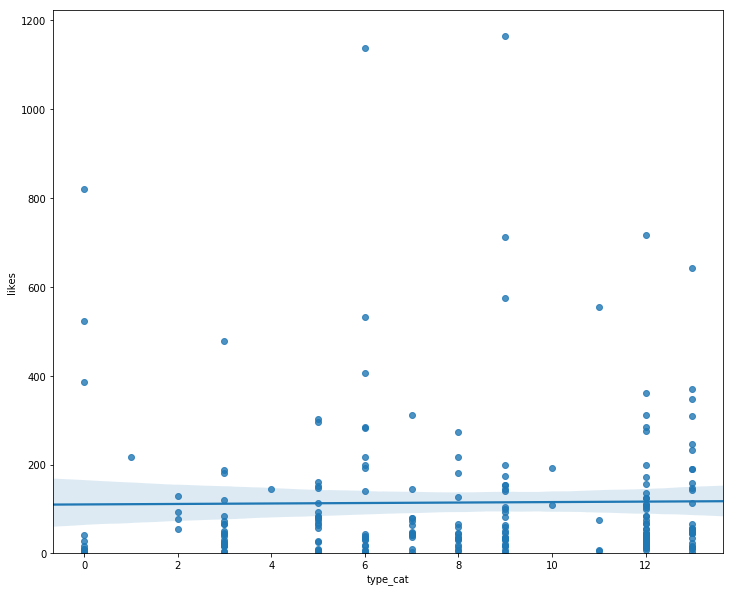

In [40]:
import seaborn as sns
%matplotlib inline 
x_data = SF_Cuisine[['type_cat']]
y_data = SF_Cuisine[['likes']]
lr = LinearRegression()
lr.fit(x_data, y_data)
yhat = lr.predict(x_data)

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="type_cat", y="likes", data=SF_Cuisine)
plt.ylim(0,)

print('The R-square is: ', lr.score(x_data, y_data))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, yhat))

## Perform Multiple Linear Regression to predict # of Likes from the cuisine type, price_tier, and zip code

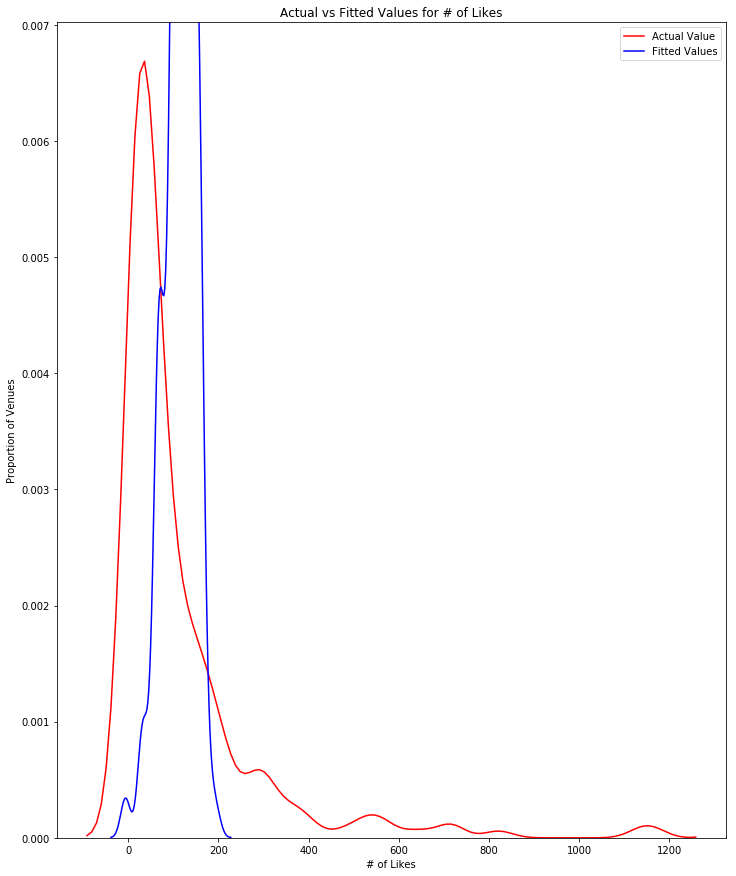

The R-square is:  0.0387952325867
The mean square error of # of likes and predicted value is:  27536.1854173


In [42]:
Z = SF_Cuisine[['type_cat', 'price_tier', 'zipcode']]
y_data = SF_Cuisine[['likes']]
lr = LinearRegression()
lr.fit(Z, y_data)
y_predict_multifit = lr.predict(Z)

width = 12
height = 15
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict_multifit, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for # of Likes')
plt.xlabel('# of Likes')
plt.ylabel('Proportion of Venues')

plt.show()
plt.close()

print('The R-square is: ', lr.score(Z, y_data))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, y_predict_multifit))

## Perform Multivariate Polynomial Regression to predict # of Likes from the cuisine type, price_tier, and zip code

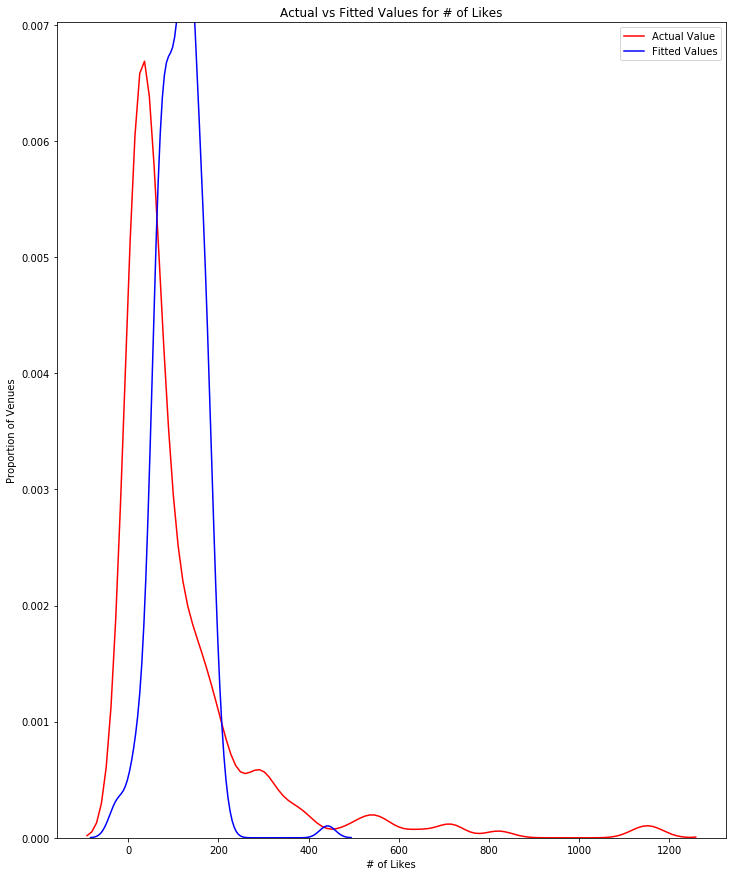

The R-square is:  0.0874940656414
The mean square error of # of likes and predicted value is:  26141.0819575


In [56]:
Z = SF_Cuisine[['type_cat', 'price_tier', 'zipcode']]
y_data = SF_Cuisine[['likes']]

# Polynomial Regression of the 4th order
pr = PolynomialFeatures(degree = 4)
Z_pr = pr.fit_transform(Z)
lr = LinearRegression()
lr.fit(Z_pr, y_data)
y_poly_pred = lr.predict(Z_pr)

width = 12
height = 15
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(y_poly_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for # of Likes')
plt.xlabel('# of Likes')
plt.ylabel('Proportion of Venues')

plt.show()
plt.close()

print('The R-square is: ', r2_score(y_data,y_poly_pred))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, y_poly_pred))

## Examine aggregates of SF Cuisine types

In [99]:
dict = {'likes': ['count', 'mean'], 'price_tier': ['mean']}
SF_Cuisine.groupby('type').agg(dict)

price_tier likes            
                     mean count        mean
type                                       
Chinese          1.714286    14  133.357143
Cuban            2.000000     1  218.000000
Ethiopian        1.750000     4   88.500000
Indian           1.909091    22   73.681818
Indonesian       2.000000     1  145.000000
Italian          2.095238    21   88.809524
Japanese         1.947368    19  190.789474
Korean           2.000000    14   73.285714
Mediterranean    1.687500    16   74.375000
Mexican          1.321429    28  153.071429
Middle Eastern   1.500000     2  150.500000
Peruvian         1.750000     4  161.250000
Thai             1.826087    46   96.869565
Vietnamese       1.310345    29  127.206897

## Get venue data for Los Angeles vicinity

In [69]:
LA_Cuisine = pd.DataFrame()
for search_query in CuisineTypes:
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&categoryId={}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Location_2, CATEGORY, VERSION, search_query, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    df = json_normalize(venues)
    df = df[['name', 'categories', 'id', 'location.city', 'location.lat', 'location.lng', 'location.postalCode']]
    df = df.rename(columns={'categories': 'type', 'location.city': 'city', 'location.lat': 'latitude', 'location.lng': 'longitude', 'location.postalCode': 'zipcode'})
    df['type'] = search_query
    LA_Cuisine = LA_Cuisine.append(df)
    
LA_Cuisine.reset_index(drop = True, inplace = True)
LA_Cuisine

,name,type,id,city,latitude,longitude,zipcode
0,Gill’s Indian Restaurant| ORDER FOOD ONLINE,Indian,4f3235c319836c91c7c0fef7,Los Angeles,34.044647,-118.258433,90017
1,Manas Indian Cuisine,Indian,4b528cb3f964a520ec8127e3,Los Angeles,34.028826,-118.291656,90007
2,Spice Affair Beverly Hills Indian Restaurant,Indian,50b803ace4b036209ce29a5d,Beverly Hills,34.066928,-118.375966,90211
3,"India's Tandoori-Authentic Indian Cuisine, Hal...",Indian,4b563ca5f964a520ca0628e3,Los Angeles,34.062251,-118.347645,90036
4,The Indian Kitchen,Indian,4e73e7f2ae60c3285070d4ba,West Hollywood,34.090861,-118.367055,90046
5,The Indian Cafe,Indian,58ff91c7f193c07ced04b301,Los Angeles,34.044679,-118.258415,90017
6,Mayura Indian Restaurant,Indian,4b130710f964a520ee9223e3,Culver City,34.019962,-118.404037,90232
7,Little Indian Cuisine,Indian,4f32387619836c91c7c2068f,Los Angeles,34.047774,-118.254383,90014
8,Amardesh Indian Cuisine,Indian,57eb831c498edeb7a788b3cf,Los Angeles,34.052698,-118.283843,90006
9,Clay Oven Indian Restaurant,Indian,4af22b13f964a5204be621e3,Sherman Oaks,34.151430,-118.451408,91403


## Drop from dataframe venues not located in Los Angeles

In [70]:
LA_Cuisine = LA_Cuisine[LA_Cuisine.city == 'Los Angeles'].reset_index(drop = True)
LA_Cuisine

,name,type,id,city,latitude,longitude,zipcode
0,Gill’s Indian Restaurant| ORDER FOOD ONLINE,Indian,4f3235c319836c91c7c0fef7,Los Angeles,34.044647,-118.258433,90017
1,Manas Indian Cuisine,Indian,4b528cb3f964a520ec8127e3,Los Angeles,34.028826,-118.291656,90007
2,"India's Tandoori-Authentic Indian Cuisine, Hal...",Indian,4b563ca5f964a520ca0628e3,Los Angeles,34.062251,-118.347645,90036
3,The Indian Cafe,Indian,58ff91c7f193c07ced04b301,Los Angeles,34.044679,-118.258415,90017
4,Little Indian Cuisine,Indian,4f32387619836c91c7c2068f,Los Angeles,34.047774,-118.254383,90014
5,Amardesh Indian Cuisine,Indian,57eb831c498edeb7a788b3cf,Los Angeles,34.052698,-118.283843,90006
6,Korea/indian Market,Indian,4e84ff247ee6763749960968,Los Angeles,34.061341,-118.278782,NaN
7,Golden Indian Grill,Indian,4bc38523b492d13a64dea860,Los Angeles,34.051769,-118.369458,90035
8,No Tomatoes! an Indian café,Indian,4e7e40915c5cd809cf5b7014,Los Angeles,34.073398,-118.376850,90048
9,Anarkali Indian Restaurant,Indian,49c48d90f964a520ce561fe3,Los Angeles,34.083551,-118.343263,90038


## Plot venue data on map

In [101]:
# Los Angeles latitude and longitude values
LA_Lat = 34.05
LA_Lng = -118.24

# create map
LA_Map = folium.Map(location=[LA_Lat, LA_Lng], zoom_start = 11)

venues = folium.map.FeatureGroup()

# loop through all venues and add each to the feature group
for lat, lng, in zip(LA_Cuisine.latitude, LA_Cuisine.longitude):
    venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    ).add_to(LA_Map)

LA_Map

## Get the number of likes, rating, and price tier for each venue

In [83]:
LA_Cuisine['likes'] = ''
LA_Cuisine['rating'] = ''
LA_Cuisine['price_tier'] = ''
for index, venue in LA_Cuisine.iterrows():
    url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(venue['id'], CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url).json()
    LA_Cuisine.loc[index, 'likes'] = results['response']['likes']['count']
    url_rating_price = 'https://api.foursquare.com/v2/venues/{}/?client_id={}&client_secret={}&v={}'.format(venue['id'], CLIENT_ID, CLIENT_SECRET, VERSION)
    results_rating_price = requests.get(url_rating_price).json()
    try:
        LA_Cuisine.loc[index, 'rating'] = results_rating_price['response']['venue']['rating']
    except KeyError:
        LA_Cuisine.loc[index, 'rating'] = 'NaN'         
    try:
        LA_Cuisine.loc[index, 'price_tier'] = results_rating_price['response']['venue']['price']['tier']
    except KeyError:
        LA_Cuisine.loc[index, 'price_tier'] = 'NaN'
    
LA_Cuisine

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier
0,Gill’s Indian Restaurant| ORDER FOOD ONLINE,Indian,4f3235c319836c91c7c0fef7,Los Angeles,34.044647,-118.258433,90017,0,NaN,1
1,Manas Indian Cuisine,Indian,4b528cb3f964a520ec8127e3,Los Angeles,34.028826,-118.291656,90007,32,6.7,1
2,"India's Tandoori-Authentic Indian Cuisine, Hal...",Indian,4b563ca5f964a520ca0628e3,Los Angeles,34.062251,-118.347645,90036,20,7.4,2
3,The Indian Cafe,Indian,58ff91c7f193c07ced04b301,Los Angeles,34.044679,-118.258415,90017,0,NaN,2
4,Little Indian Cuisine,Indian,4f32387619836c91c7c2068f,Los Angeles,34.047774,-118.254383,90014,0,NaN,2
5,Amardesh Indian Cuisine,Indian,57eb831c498edeb7a788b3cf,Los Angeles,34.052698,-118.283843,90006,0,NaN,NaN
6,Korea/indian Market,Indian,4e84ff247ee6763749960968,Los Angeles,34.061341,-118.278782,NaN,0,NaN,NaN
7,Golden Indian Grill,Indian,4bc38523b492d13a64dea860,Los Angeles,34.051769,-118.369458,90035,2,NaN,2
8,No Tomatoes! an Indian café,Indian,4e7e40915c5cd809cf5b7014,Los Angeles,34.073398,-118.376850,90048,3,5.9,2
9,Anarkali Indian Restaurant,Indian,49c48d90f964a520ce561fe3,Los Angeles,34.083551,-118.343263,90038,32,7.2,2


## Remove data with missing values in zipcode, rating, and price_tier

In [84]:
LA_Cuisine = LA_Cuisine[LA_Cuisine['rating'] != 'NaN']
LA_Cuisine = LA_Cuisine[LA_Cuisine['price_tier'] != 'NaN']
LA_Cuisine.dropna(axis=0, subset=['zipcode'], inplace = True)
LA_Cuisine.reset_index(drop = True, inplace = True)
LA_Cuisine.head(15)

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier
0,Manas Indian Cuisine,Indian,4b528cb3f964a520ec8127e3,Los Angeles,34.028826,-118.291656,90007,32,6.7,1
1,"India's Tandoori-Authentic Indian Cuisine, Hal...",Indian,4b563ca5f964a520ca0628e3,Los Angeles,34.062251,-118.347645,90036,20,7.4,2
2,No Tomatoes! an Indian café,Indian,4e7e40915c5cd809cf5b7014,Los Angeles,34.073398,-118.376850,90048,3,5.9,2
3,Anarkali Indian Restaurant,Indian,49c48d90f964a520ce561fe3,Los Angeles,34.083551,-118.343263,90038,32,7.2,2
4,Anar Indian Restaurant,Indian,515488f9e4b00a6313dbbe75,Los Angeles,34.104152,-118.330300,90028,13,6.9,1
5,Hurry Curry Indian Food,Indian,4b4fe7acf964a520311927e3,Los Angeles,34.000054,-118.441280,90066,12,6.2,1
6,Chinese Friends Restaurant,Chinese,4b94626cf964a5203a7734e3,Los Angeles,34.066544,-118.235991,90012,16,7.3,1
7,Phoenix Inn Chinese Cuisine,Chinese,4b061536f964a52069e822e3,Los Angeles,34.060129,-118.238735,90012,33,7.7,1
8,Qin West Chinese Cuisine,Chinese,54f3890f498ed9a991bfa0a0,Los Angeles,34.061375,-118.239398,90012,6,6.1,1
9,Shin Beijing Chinese Cuisine,Chinese,4b66410af964a520e01a2be3,Los Angeles,34.052814,-118.303282,90006,7,5.9,2


## Encode Cuisine Type as categorical

In [85]:
LA_Cuisine['type'] = LA_Cuisine['type'].astype('category')
LA_Cuisine['type_cat'] = LA_Cuisine['type'].cat.codes
LA_Cuisine.reset_index(drop = True, inplace = True)
LA_Cuisine.head(15)

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier,type_cat
0,Manas Indian Cuisine,Indian,4b528cb3f964a520ec8127e3,Los Angeles,34.028826,-118.291656,90007,32,6.7,1,3
1,"India's Tandoori-Authentic Indian Cuisine, Hal...",Indian,4b563ca5f964a520ca0628e3,Los Angeles,34.062251,-118.347645,90036,20,7.4,2,3
2,No Tomatoes! an Indian café,Indian,4e7e40915c5cd809cf5b7014,Los Angeles,34.073398,-118.376850,90048,3,5.9,2,3
3,Anarkali Indian Restaurant,Indian,49c48d90f964a520ce561fe3,Los Angeles,34.083551,-118.343263,90038,32,7.2,2,3
4,Anar Indian Restaurant,Indian,515488f9e4b00a6313dbbe75,Los Angeles,34.104152,-118.330300,90028,13,6.9,1,3
5,Hurry Curry Indian Food,Indian,4b4fe7acf964a520311927e3,Los Angeles,34.000054,-118.441280,90066,12,6.2,1,3
6,Chinese Friends Restaurant,Chinese,4b94626cf964a5203a7734e3,Los Angeles,34.066544,-118.235991,90012,16,7.3,1,0
7,Phoenix Inn Chinese Cuisine,Chinese,4b061536f964a52069e822e3,Los Angeles,34.060129,-118.238735,90012,33,7.7,1,0
8,Qin West Chinese Cuisine,Chinese,54f3890f498ed9a991bfa0a0,Los Angeles,34.061375,-118.239398,90012,6,6.1,1,0
9,Shin Beijing Chinese Cuisine,Chinese,4b66410af964a520e01a2be3,Los Angeles,34.052814,-118.303282,90006,7,5.9,2,0


## Convert numerical variables to int and float

In [86]:
LA_Cuisine[['zipcode']] = np.int64(LA_Cuisine[['zipcode']])
LA_Cuisine[['price_tier']] = np.int64(LA_Cuisine[['price_tier']])
LA_Cuisine[['rating']] = np.float64(LA_Cuisine[['rating']])

## Examine correlation of variables

In [88]:
LA_Cuisine[['type_cat', 'zipcode', 'rating', 'price_tier', 'likes']].corr()

,type_cat,zipcode,rating,price_tier,likes
type_cat,1.000000,0.011249,0.048022,-0.001568,0.034683
zipcode,0.011249,1.000000,-0.090945,-0.154761,-0.100594
rating,0.048022,-0.090945,1.000000,0.104076,0.558724
price_tier,-0.001568,-0.154761,0.104076,1.000000,0.195899
likes,0.034683,-0.100594,0.558724,0.195899,1.000000


## Perform Simple Linear Regression to predict # of Likes from the cuisine type

The R-square is:  0.00120288156595
The mean square error of # of likes and predicted value is:  3859.1339009


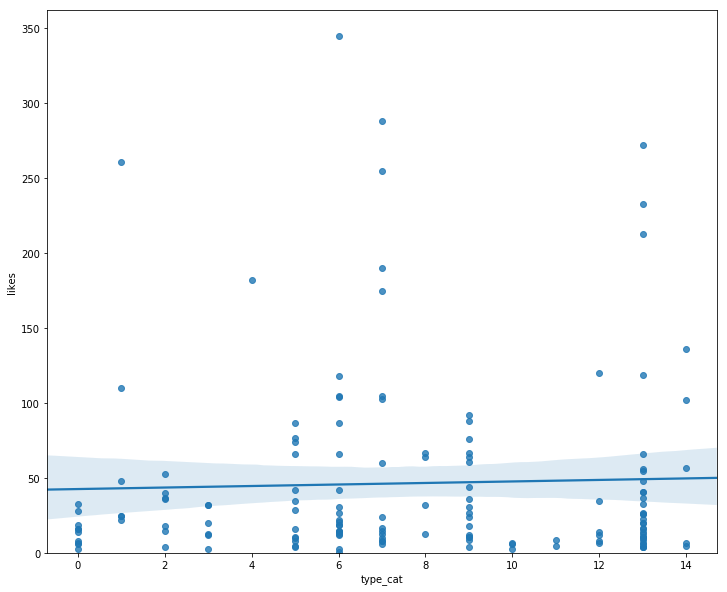

In [89]:
import seaborn as sns
%matplotlib inline 
x_data = LA_Cuisine[['type_cat']]
y_data = LA_Cuisine[['likes']]
lr = LinearRegression()
lr.fit(x_data, y_data)
yhat = lr.predict(x_data)

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="type_cat", y="likes", data=LA_Cuisine)
plt.ylim(0,)

print('The R-square is: ', lr.score(x_data, y_data))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, yhat))

## Perform Multiple Linear Regression to predict # of Likes from the cuisine type, price_tier, and zip code

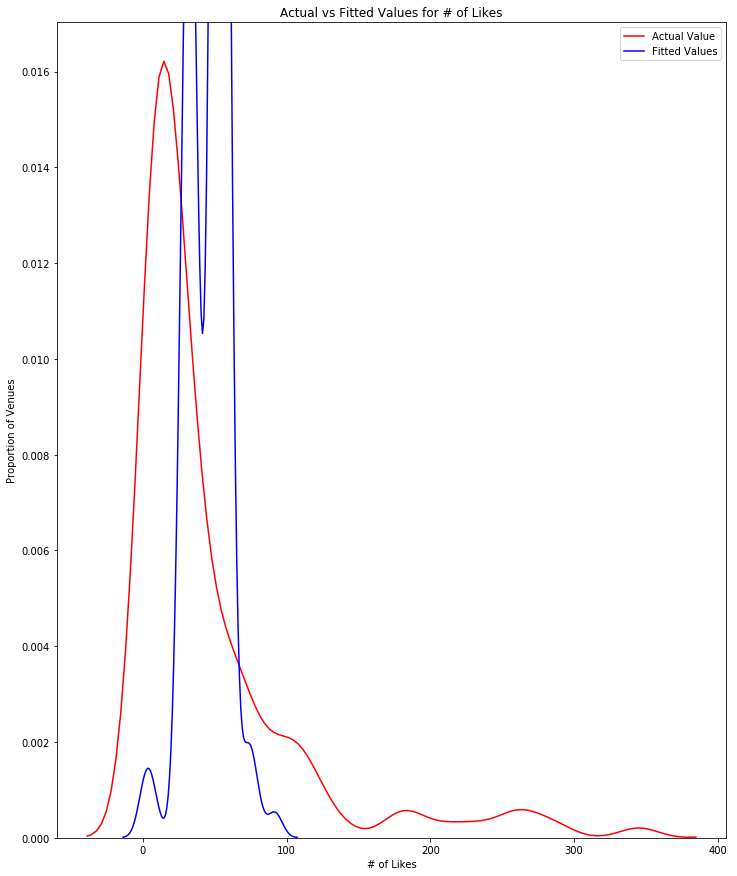

The R-square is:  0.0447168485074
The mean square error of # of likes and predicted value is:  3691.00543728


In [91]:
Z = LA_Cuisine[['type_cat', 'price_tier', 'zipcode']]
y_data = LA_Cuisine[['likes']]
lr = LinearRegression()
lr.fit(Z, y_data)
y_predict_multifit = lr.predict(Z)

width = 12
height = 15
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict_multifit, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for # of Likes')
plt.xlabel('# of Likes')
plt.ylabel('Proportion of Venues')

plt.show()
plt.close()

print('The R-square is: ', lr.score(Z, y_data))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, y_predict_multifit))

## Perform Multivariate Polynomial Regression to predict # of Likes from the cuisine type, price_tier, and zip code

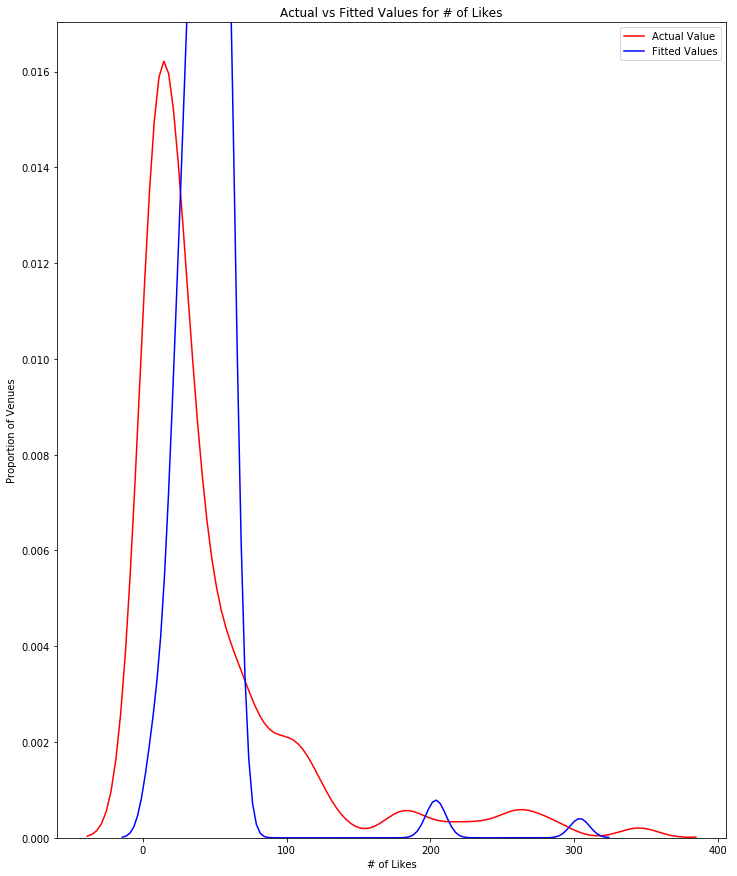

The R-square is:  0.263855024567
The mean square error of # of likes and predicted value is:  2844.30339079


In [93]:
Z = LA_Cuisine[['type_cat', 'price_tier', 'zipcode']]
y_data = LA_Cuisine[['likes']]

# Polynomial Regression of the 4th order
pr = PolynomialFeatures(degree = 4)
Z_pr = pr.fit_transform(Z)
lr = LinearRegression()
lr.fit(Z_pr, y_data)
y_poly_pred = lr.predict(Z_pr)

width = 12
height = 15
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(y_poly_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for # of Likes')
plt.xlabel('# of Likes')
plt.ylabel('Proportion of Venues')

plt.show()
plt.close()

print('The R-square is: ', r2_score(y_data,y_poly_pred))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, y_poly_pred))

## Examine aggregates of LA Cuisine types

In [98]:
dict = {'likes': ['count', 'mean'], 'price_tier': ['mean']}
LA_Cuisine.groupby('type').agg(dict)

price_tier likes            
                     mean count        mean
type                                       
Chinese          1.600000    10   15.000000
Cuban            1.833333     6   81.833333
Ethiopian        2.000000     7   29.000000
Indian           1.500000     6   18.666667
Indonesian       2.000000     1  182.000000
Italian          1.461538    13   35.692308
Japanese         1.850000    20   53.950000
Korean           2.066667    15   85.133333
Mediterranean    1.750000     4   44.000000
Mexican          1.235294    17   39.705882
Middle Eastern   2.000000     3    5.333333
Mongolian        1.500000     2    7.000000
Peruvian         1.833333     6   32.666667
Thai             1.709677    31   47.806452
Vietnamese       2.000000     5   61.400000